<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Optimization</h1></center>
<center><h2>Lab1: Optimization 101 (3h)</h2></center>

# Structure of an optimization program

An optimization program can be practically divided into three parts:
* the *run* environment, in which you test, run your program, and display results.
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used.

In the present lab, you will use this division:
* `1_Optimization101.ipynb` will be the *run* environment
* `problem1.ipynb` .. `problem5.ipynb` will be the considered *problems* for this lab (see <a href="#pbs">Problems</a>)
* `algoGradient.ipynb` will contain the gradient *algorithms* studied in this lab

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# 1. Gradient algorithms on a simple function

We begin by investigating <a href="#pb3">Problem 1</a>

> Observe the 3D and level plots of the function.

In [2]:
import problem1 as pb1

importing notebook from problem1.ipynb


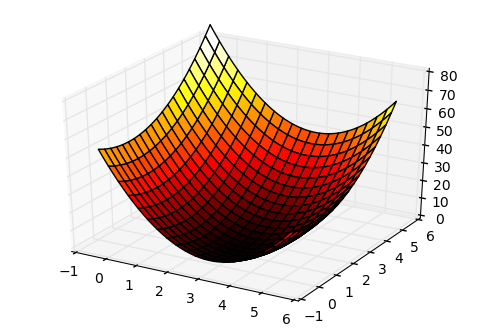

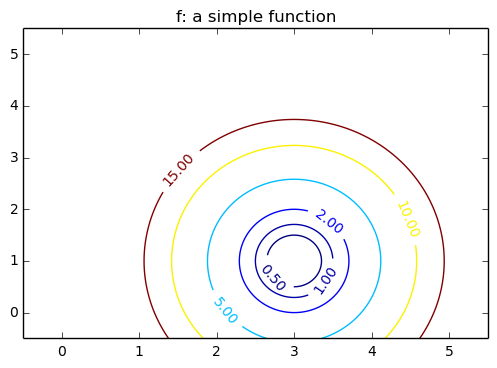

In [3]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb1.f, pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.vmin, pb1.vmax )
level_plot( pb1.f, pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.levels , pb1.title )

### 1.a. simple gradient algorithm

> Examine the functions and variables defined in `problem1.ipynb` <br/>
> Complete the function `gradient_algorithm` as asked in `algoGradient.ipynb [Sec. 1a]` <br/>
> Examine and run the cells below. Notably change the step size `step` and observe the different behaviors of the algorithm.

In [4]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import problem1 as pb1
reload(pb1) 

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point
step    = 1.0/pb1.L                # Stepsize 


##### Gradient algorithm


x,x_tab = gradient_algorithm(pb1.f , pb1.f_grad , x0 , step , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
importing notebook from algoGradient.ipynb
importing notebook from problem1.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.125
FINISHED -- 19 iterations / 0.000422s -- final value: 38.000000 at point (0.00,0.00)




##### Plotting

The following cell plots the iterates over the level sets of the minimized function.

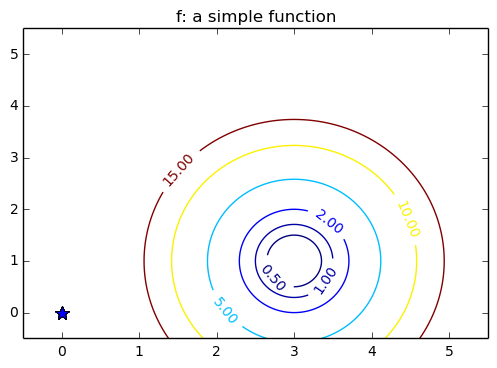

In [5]:
from plotLib import *
%matplotlib inline

level_points_plot( pb1.f , x_tab , pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.levels , pb1.title )

---
### 1.b. Newton algorithm

> Examine the functions and variables defined in `problem1.ipynb` <br/>
> Complete the function `newton_algorithm` as asked in `algoGradient.ipynb [Sec. 2]` <br/>
> Examine and run the cells below. In how many iterations does the algorithm converge? Why?

In [6]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment

import problem1 as pb1
reload(pb1) 

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point

##### Newton algorithm
xn,xn_tab = newton_algorithm(pb1.f , pb1.f_grad_hessian , x0  , PREC , ITE_MAX )



importing notebook from algoGradient.ipynb
importing notebook from problem1.ipynb
------------------------------------
Newton's algorithm
------------------------------------
START
FINISHED -- 19 iterations / 0.000699s -- final value: 38.000000 at point (0.00,0.00)




##### Plotting

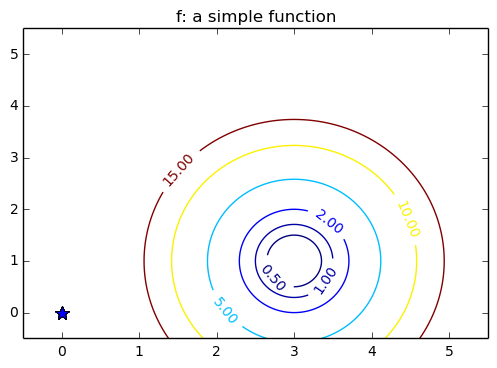

In [7]:
from plotLib import *
%matplotlib inline

level_points_plot( pb1.f , xn_tab , pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.levels , pb1.title )

---
##### Comparing gradient algorithm and Newton method

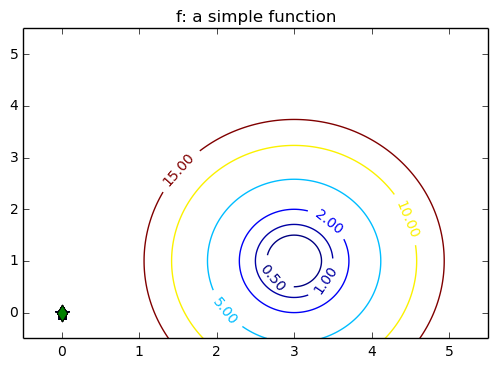

In [8]:
from plotLib import *
%matplotlib inline

##### comparison
level_2points_plot( pb1.f , x_tab , xn_tab ,  pb1.x1_min, pb1.x1_max, pb1.x2_min, pb1.x2_max, pb1.nb_points,  pb1.levels ,  pb1.title )

---
# 2. More involved functions

Now, we investigate other functions and examine the behavior of gradient algorithms in these cases.

### 2.a  Shaper functions

<a href="#pb3">Problem 2</a> features a sharper function. 


importing notebook from problem2.ipynb
importing notebook from problem2.ipynb


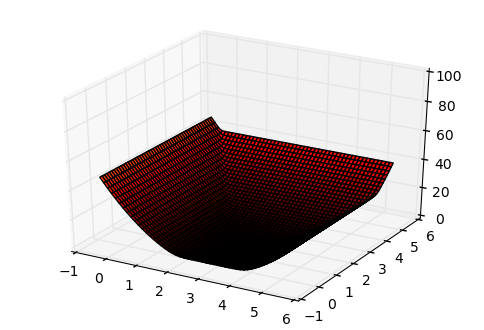

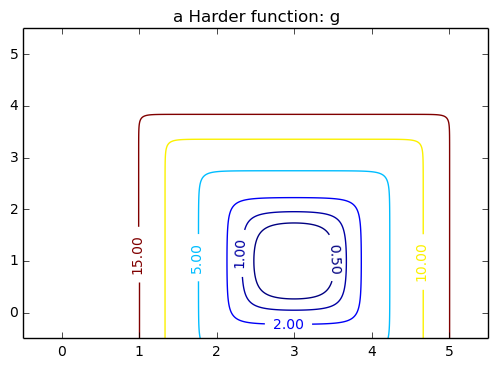

In [9]:
import problem2 as pb2
reload(pb2) 

from plotLib import *
%matplotlib inline

custom_3dplot( pb2.f, pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.vmin, pb2.vmax )
level_plot( pb2.f, pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.levels , pb2.title )

> Fill the needed 1st and 2nd order oracles in `problem2.ipynb`.<br/>
> Run and compare constant stepsize gradient and Newton algorithms.

In [10]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment
import numpy as np

import problem2 as pb2
reload(pb2) 

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point

##### Gradient algorithm
step    = 1.0/pb2.L                # Stepsize 
x,x_tab = gradient_algorithm(pb2.f , pb2.f_grad , x0 , step , PREC , ITE_MAX )

##### Newton algorithm
xn,xn_tab = newton_algorithm(pb2.f , pb2.f_grad_hessian , x0  , PREC , ITE_MAX )

importing notebook from algoGradient.ipynb
importing notebook from problem2.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.125
FINISHED -- 19 iterations / 0.000376s -- final value: 34.901388 at point (0.00,0.00)


------------------------------------
Newton's algorithm
------------------------------------
START
FINISHED -- 19 iterations / 0.000432s -- final value: 34.901388 at point (0.00,0.00)




---
##### Comparing gradient algorithm and Newton method

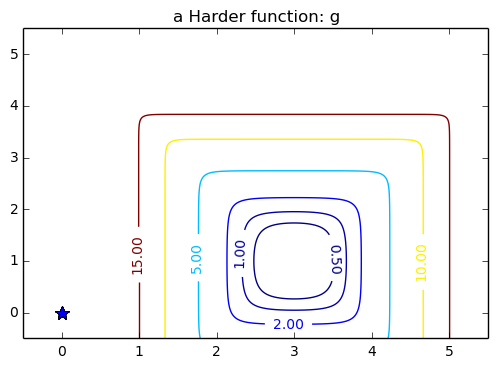

In [11]:
from plotLib import *
%matplotlib inline

##### comparison
level_points_plot( pb2.f , x_tab , pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.levels , pb2.title )
#level_points_plot( pb2.f , xn_tab , pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.levels , pb2.title )
#level_2points_plot( pb2.f , x_tab , xn_tab ,  pb2.x1_min, pb2.x1_max, pb2.x2_min, pb2.x2_max, pb2.nb_points,  pb2.levels ,  pb2.title )

### 2.b Non-convex functions

<a href="#pb3">Problem 3</a> features classical Rosenbrock non-convex function. 


importing notebook from problem3.ipynb
importing notebook from problem3.ipynb


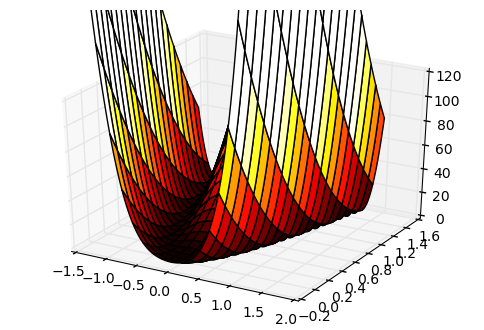

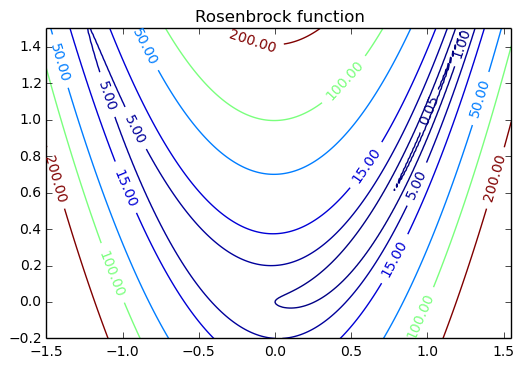

In [12]:
import problem3 as pb3
reload(pb3) 

from plotLib import *
%matplotlib inline

custom_3dplot( pb3.f, pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.vmin, pb3.vmax )
level_plot( pb3.f, pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )

> Fill the needed 1st and 2nd order oracles in `problem3.ipynb`.<br/>
> Run and compare constant stepsize gradient and Newton algorithms.

In [13]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment
import numpy as np

import problem3 as pb3
reload(pb3) 

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point

##### Gradient algorithm
step    =  0.1                     # Stepsize 
x,x_tab = gradient_algorithm(pb3.f , pb3.f_grad , x0 , step , PREC , ITE_MAX )

##### Newton algorithm
xn,xn_tab = newton_algorithm(pb3.f , pb3.f_grad_hessian , x0  , PREC , ITE_MAX )

importing notebook from algoGradient.ipynb
importing notebook from problem3.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 19 iterations / 0.000467s -- final value: 1.000000 at point (0.00,0.00)


------------------------------------
Newton's algorithm
------------------------------------
START
FINISHED -- 19 iterations / 0.000329s -- final value: 1.000000 at point (0.00,0.00)




---
##### Comparing gradient algorithm and Newton method

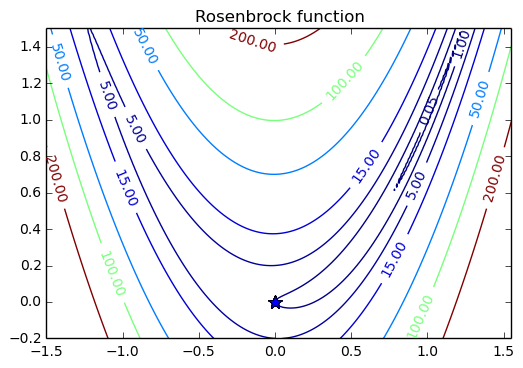

In [14]:
from plotLib import *
%matplotlib inline


##### comparison
level_points_plot( pb3.f , x_tab , pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )
#level_points_plot( pb3.f , xn_tab , pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )
#level_2points_plot( pb3.f , x_tab , xn_tab ,  pb3.x1_min, pb3.x1_max, pb3.x2_min, pb3.x2_max, pb3.nb_points,  pb3.levels ,  pb3.title )

> try and correct the gradient algorithm behavior by creating an adaptative stepsize algorithm in `algoGradient.ipynb [Sec. 1b]`.

### 2.c Non-convex functions with mutliple minimizers

<a href="#pb4">Problem 4</a> features a smooth non-convex function with two minimizers. 


importing notebook from problem4.ipynb
importing notebook from problem4.ipynb


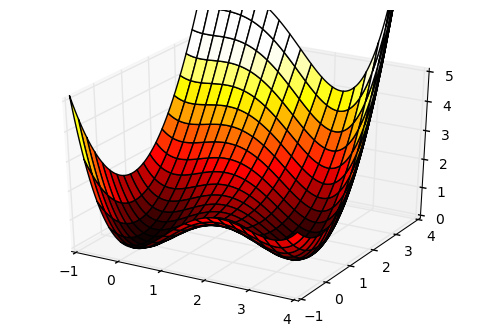

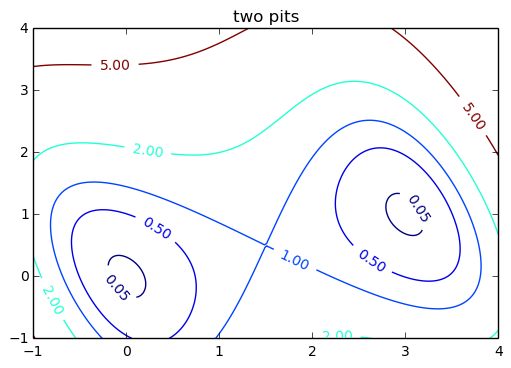

In [15]:
import problem4 as pb4
reload(pb4) 

from plotLib import *
%matplotlib inline

custom_3dplot( pb4.f, pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.vmin, pb4.vmax )
level_plot( pb4.f, pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )

> Fill the needed 1st order oracles in `problem4.ipynb`. Can you compute a second order oracle?<br/>
> Run the constant and adaptive stepsize gradient algorithms. Change the initialization and observe the final point.

In [16]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment
import numpy as np

import problem4 as pb4
reload(pb4) 

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 50                       # Max number of iterations
x0      = np.array( (1.5,0.55 ) )   # Initial point

##### Gradient algorithm
step    =  0.1                     # Stepsize 
x,x_tab = gradient_algorithm(pb4.f , pb4.f_grad , x0 , step , PREC , ITE_MAX )


importing notebook from algoGradient.ipynb
importing notebook from problem4.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 49 iterations / 0.000729s -- final value: 1.000700 at point (1.50,0.55)




---
##### Comparing gradient algorithm and Newton method

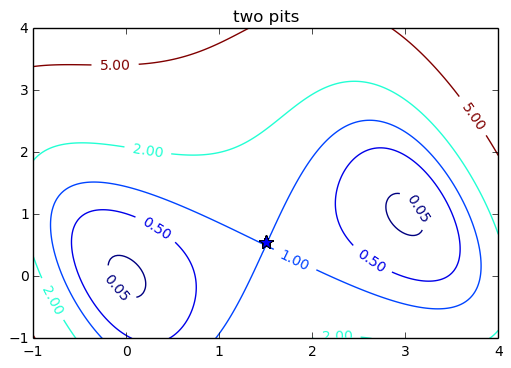

In [17]:
from plotLib import *
%matplotlib inline


##### comparison
level_points_plot( pb4.f , x_tab , pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )
#level_points_plot( pb4.f , xn_tab , pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )
#level_2points_plot( pb4.f , x_tab , xn_tab ,  pb4.x1_min, pb4.x1_max, pb4.x2_min, pb4.x2_max, pb4.nb_points,  pb4.levels ,  pb4.title )

> What would you do if you would like to find *all* minimizers?

### 2.d Polyhedral functions

<a href="#pb5">Problem 5</a> features a convex polydehral function. 


importing notebook from problem5.ipynb
importing notebook from problem5.ipynb


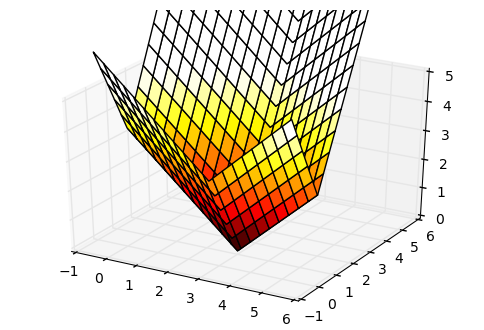

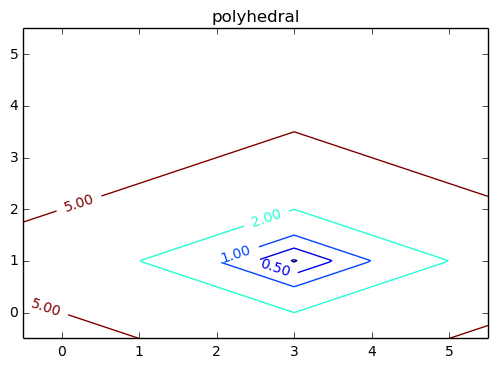

In [18]:
import problem5 as pb5
reload(pb5) 

from plotLib import *
%matplotlib inline

custom_3dplot( pb5.f, pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.vmin, pb5.vmax )
level_plot( pb5.f, pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )

> Fill the needed 1st order oracles in `problem5.ipynb`. What is different from before?<br/>
> Run the constant and adaptive stepsize gradient algorithms. Change the initialization and observe the final point.

In [19]:
import algoGradient         # load our algoGradient module (from notebook)
reload(algoGradient)        # reload the module if changed (and saved)
from algoGradient import *  # import all methods of the module into the current environment
import numpy as np

import problem5 as pb5
reload(pb5) 

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 50                       # Max number of iterations
x0      = np.array( (1.5,0.55 ) )   # Initial point

##### Gradient algorithm
step    =  0.1                     # Stepsize 
x,x_tab = gradient_algorithm(pb5.f , pb5.f_grad , x0 , step , PREC , ITE_MAX )
xa,xa_tab = gradient_adaptive_algorithm(pb5.f , pb5.f_grad , x0 , step , PREC , ITE_MAX )

importing notebook from algoGradient.ipynb
importing notebook from problem5.ipynb
------------------------------------
 Constant Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 49 iterations / 0.000802s -- final value: 2.400000 at point (1.50,0.55)


------------------------------------
Adaptative Stepsize gradient
------------------------------------
START    -- stepsize = 0.1
FINISHED -- 49 iterations / 0.000634s -- final value: 2.400000 at point (1.50,0.55)




---
##### Comparing gradient algorithm and adaptive stepsize method

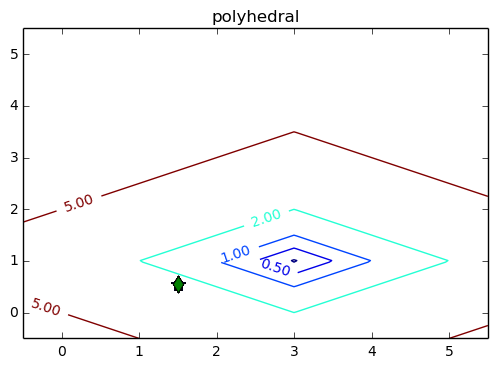

In [20]:
from plotLib import *
%matplotlib inline


##### comparison
#level_points_plot( pb5.f , x_tab , pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )
#level_points_plot( pb5.f , xa_tab , pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )
level_2points_plot( pb5.f , x_tab , xa_tab ,  pb5.x1_min, pb5.x1_max, pb5.x2_min, pb5.x2_max, pb5.nb_points,  pb5.levels ,  pb5.title )

> What would you do to minimize polyhedral functions?

# Appendix: <a id="pbs">Problems</a>

The problems we consider in this first lab are minimizations of unconstrained continous functions. 


> **1.** <a id="pb3">`problem1`</a> features a simple quadratic function
$$\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2-1)^2
\end{array}$$
<center><img src="Fig/1.png" width="50%"></center>


> **2.** <a id="pb3">`problem2`</a> features a more involved but very smooth function
$$\begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3)
\end{array}$$
<center><img src="Fig/2.png" width="50%"></center>


> **3.** <a id="pb3">`problem3`</a> features Rosenbrock's smooth but non-convex function
$$\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{array}$$
<center><img src="Fig/3.png" width="50%"></center>


> **4.** <a id="pb4">`problem4`</a> features a smooth function with two distinct minimizers
$$\begin{array}{rrcll}
t: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & (0.6 x_1 + 0.2 x_2)^2 \left((0.6 x_1 + 0.2 x_2)^2 - 4 (0.6 x_1 + 0.2 x_2)+4\right) + (-0.2 x_1 + 0.6 x_2)^2
\end{array}$$
<center><img src="Fig/4.png" width="50%"></center>


> **5.** <a id="pb5">`problem5`</a> features a polyhedral function
$$\begin{array}{rrcll}
p: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  \left| x_1-3 \right|  + 2\left| x_2-1\right| .
\end{array}$$
<center><img src="Fig/5.png" width="50%"></center>

